# 👹 Fera Formidável 4.1

> Atividade realizada em dupla: Caio Ruas (24010) e Thalles Cansi (24006)

Um novo nível de monstro aparece nas florestas mágicas de LUMI. Esta é a primeira aparição de um monstro do tipo **Fera Formidável**. Para derrotar esta fera, precisaremos utilizar nossos conhecimentos de Redes Neurais para resolver um problema de
classificação. Vamos treinar uma rede neural com dados da planta Íris [1] que é um conjunto de dados clássico em tarefas de classificação, possui 150 amostras com 4 atributos (comprimento e largura das sépalas e pétalas) e 3 classes correspondentes às espécies de íris.

![Flores de Íris](Imagens/FloresÍris.png)

<center>
Legenda 1: Diferenças entre flores de Íris [2].
</center>

Estaremos utilizando o mesmo código da aula, provido pelo professor, para construir e treinar a rede neural.

## 🔢 Valor

Esta é a classe Valor, que representa um valor numérico com suporte a diferenciação automática. Ela possui métodos para operações matemáticas, como adição, subtração, multiplicação e exponenciação, além de métodos para calcular a função sigmoide e backpropagation. É notório lembrar que realiza-se os cálculos mesmo com ordem invertida, onde o objeto Valor pode ser o primeiro ou segundo operando.

In [1]:
import math

class Valor:
    """
    Classe que representa um valor numérico com suporte a diferenciação automática.
    
    Cada instância armazena:
      - data: o valor numérico.
      - progenitor: tupla com os valores dos quais este foi derivado.
      - operador_mae: string representando a operação que gerou o valor.
      - grad: gradiente (inicialmente zero) usado no backpropagation.
    """
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        """
        Inicializa uma instância de Valor.
        
        Args:
            data (float): o valor numérico.
            progenitor (tuple): valores anteriores que contribuíram para este.
            operador_mae (str): operação que gerou o valor.
            rotulo (str): rótulo opcional para identificação.
        """
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        """Retorna uma representação string simplificada do objeto."""
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        """
        Sobrecarga do operador de adição.
        
        Realiza a operação: self + outro_valor.
        
        Args:
            outro_valor (Valor ou número): valor a ser somado.
        
        Returns:
            Valor: novo objeto representando a soma.
        """
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado

    def __mul__(self, outro_valor):
        """
        Sobrecarga do operador de multiplicação.
        
        Realiza a operação: self * outro_valor.
        
        Args:
            outro_valor (Valor ou número): valor a ser multiplicado.
        
        Returns:
            Valor: novo objeto representando o produto.
        """
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado

    def exp(self):
        """
        Calcula a exponencial do valor.
        
        Realiza a operação: exp(self).
        
        Returns:
            Valor: novo objeto representando a exponencial.
        """
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado

    def __pow__(self, expoente):
        """
        Sobrecarga do operador de exponenciação.
        
        Realiza a operação: self ** expoente.
        
        Args:
            expoente (int ou float): expoente da operação.
        
        Returns:
            Valor: novo objeto representando a exponenciação.
        """
        assert isinstance(expoente, (int, float)), "Expoente deve ser um número."
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado

    def __truediv__(self, outro_valor):
        """
        Sobrecarga do operador de divisão.
        
        Realiza a operação: self / outro_valor.
        
        Args:
            outro_valor (Valor ou número): divisor.
        
        Returns:
            Valor: novo objeto representando a divisão.
        """
        return self * outro_valor ** (-1)

    def __neg__(self):
        """
        Sobrecarga do operador de negação.
        
        Realiza a operação: -self.
        
        Returns:
            Valor: novo objeto representando o valor negativo.
        """
        return self * -1

    def __sub__(self, outro_valor):
        """
        Sobrecarga do operador de subtração.
        
        Realiza a operação: self - outro_valor.
        
        Args:
            outro_valor (Valor ou número): valor a ser subtraído.
        
        Returns:
            Valor: novo objeto representando a subtração.
        """
        return self + (-outro_valor)

    def __radd__(self, outro_valor):
        """
        Sobrecarga do operador de adição reversa.
        
        Permite operações onde Valor está à direita: outro_valor + self.
        
        Args:
            outro_valor (Valor ou número): valor a ser somado.
        
        Returns:
            Valor: resultado da adição.
        """
        return self + outro_valor
    
    
    def __rsub__(self, outro_valor):
        """
        Sobrecarga do operador de subtração reversa.
        
        Permite operações onde Valor está à direita: outro_valor - self.
        
        Args:
            outro_valor (Valor ou número): valor a ser subtraído.
        
        Returns:
            Valor: resultado da subtração.
        """
        return outro_valor + (-self)

    def __rmul__(self, outro_valor):
        """
        Sobrecarga do operador de multiplicação reversa.
        
        Permite operações onde Valor está à direita: outro_valor * self.
        
        Args:
            outro_valor (Valor ou número): valor a ser multiplicado.
        
        Returns:
            Valor: resultado da multiplicação.
        """
        return self * outro_valor
    
    def log(self):
        """
        Calcula o logaritmo natural do valor e retorna um novo objeto Valor.
        
        Returns:
            Valor: objeto contendo log(self.data).
        """
        progenitor = (self,)
        data = math.log(self.data)
        operador_mae = "log"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_log():
            self.grad += resultado.grad / self.data
            
        resultado.propagar = propagar_log
        return resultado


    def sig(self):
        """
        Calcula a função sigmoide.
        
        Realiza a operação: exp(self) / (exp(self) + 1).
        
        Returns:
            Valor: novo objeto representando o resultado da sigmoide.
        """
        return self.exp() / (self.exp() + 1)

    def propagar(self):
        """
        Função de propagação (backpropagation) do gradiente.
        
        Este método deve ser sobrescrito pelas operações específicas.
        """
        pass

    def propagar_tudo(self):
        """
        Executa o backpropagation através de todos os nós (valores) conectados.
        
        Atribui gradiente 1 ao vértice folha e propaga recursivamente utilizando uma ordem topológica dos nós.
        """
        self.grad = 1
        ordem_topologica = []
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)

        for vertice in reversed(ordem_topologica):
            vertice.propagar()


Nós adicionamos dois novos métodos à classe `Valor`:

- `log(self)`: Calcula o logaritmo natural do valor e retorna um novo objeto Valor. Este método é útil para calcular a função de perda de entropia cruzada, que é comumente usada em problemas de classificação.
- `__rsub__`: Este método é chamado quando o objeto Valor é o segundo operando em uma subtração. Ele inverte a ordem dos operandos e chama o método `__sub__` para realizar a subtração. Isso permite que o objeto Valor seja usado em expressões como `1 - x`, onde `x` é um objeto Valor. Tivemos que adicionar esse método para evitar o erro de tipo que ocorria quando tentávamos fazer `1 - x` com um objeto Valor. Isso é importante para garantir que a subtração funcione corretamente em todas as situações, independentemente da ordem dos operandos.

## 🤓 Neurônio

A classe Neurônio representa um neurônio em uma rede neural. Ela possui pesos e um viés, que são inicializados aleatoriamente. O neurônio calcula a saída usando a função sigmoide e realiza o backpropagation para atualizar os pesos e o viés com base no erro da previsão.

In [2]:
import random


class Neuronio:
    """
    Representa um neurônio simples com pesos e viés para uso em uma rede neural.

    Este neurônio utiliza a classe Valor para armazenar seus parâmetros e realizar a
    diferenciação automática durante o treinamento.
    """

    def __init__(self, num_dados_entrada):
        """
        Inicializa um neurônio com um número especificado de entradas.

        Args:
            num_dados_entrada (int): número de entradas para o neurônio.
        """
        self.vies = Valor(random.uniform(-1, 1))

        self.pesos = []
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))

    def __call__(self, x):
        """
        Realiza a passagem forward do neurônio.

        Calcula a soma ponderada das entradas e aplica a função sigmoide para
        determinar a saída do neurônio.

        Args:
            x (list[Valor]): lista de objetos Valor representando as entradas.

        Returns:
            Valor: objeto Valor representando a saída do neurônio.
        """
        assert len(x) == len(
            self.pesos
        ), "O número de entradas deve ser igual ao número de pesos."

        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno

        soma += self.vies

        dado_de_saida = soma.sig()

        return dado_de_saida

    def parametros(self):
        """
        Retorna uma lista com os parâmetros do neurônio (pesos e viés).

        Returns:
            list[Valor]: lista contendo os pesos e o viés.
        """
        return self.pesos + [self.vies]

## 🎂 Camada

A classe Camada representa uma camada de neurônios em uma rede neural. Ela possui um número específico de neurônios e é responsável por calcular a saída da camada com base nas entradas recebidas. Realiza o forward pass e agrega os parametros de cada neurônio.

In [3]:
class Camada:
    """
    Representa uma camada em uma rede neural composta por múltiplos neurônios.

    Cada camada gerencia um conjunto de neurônios, realizando a passagem forward
    e agregando os parâmetros (pesos e viés) de cada neurônio.
    """

    def __init__(self, num_neuronios, num_dados_entrada):
        """
        Inicializa a camada com um número específico de neurônios, cada um com
        um determinado número de entradas.

        Args:
            num_neuronios (int): número de neurônios na camada.
            num_dados_entrada (int): número de entradas para cada neurônio.
        """
        self.neuronios = []
        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            self.neuronios.append(neuronio)

    def __call__(self, x):
        """
        Realiza a passagem forward na camada.

        Aplica cada neurônio da camada à mesma entrada e retorna os dados de saída.

        Args:
            x (list[Valor]): lista de objetos Valor representando as entradas da camada.

        Returns:
            Valor ou list[Valor]: saída de um único neurônio se houver apenas um,
            ou lista com as saídas de todos os neurônios.
        """
        dados_de_saida = []
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)

        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:
            return dados_de_saida

    def parametros(self):
        """
        Agrega e retorna todos os parâmetros (pesos e viés) de cada neurônio da camada.

        Returns:
            list[Valor]: lista contendo todos os parâmetros dos neurônios da camada.
        """
        params = []
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)

        return params

## 🧠 MLP

Por fim, nossa última classe da nossa rede neural é a `MLP` (Multi-Layer Perceptron). Ela representa uma rede neural com múltiplas camadas. A `MLP` organiza as camadas da rede, permitindo a passagem forward dos dados e a agregação dos parâmetros de todas as camadas.

In [4]:
class MLP:
    """
    Representa uma rede neural do tipo MLP (Multi-Layer Perceptron).

    Essa classe organiza as camadas da rede, permitindo a passagem forward dos dados e
    a agregação dos parâmetros (pesos e viés) de todas as camadas.
    """

    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        """
        Inicializa a MLP com um número definido de entradas e uma lista que especifica
        o número de neurônios em cada camada.

        Args:
            num_dados_entrada (int): número de entradas da rede.
            num_neuronios_por_camada (list[int]): lista com o número de neurônios para cada camada.
        """
        percurso = [num_dados_entrada] + num_neuronios_por_camada

        camadas = []
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """
        Realiza a passagem forward pela rede.

        Cada camada processa a entrada e o resultado é passado para a próxima camada.

        Args:
            x (list[Valor] ou Valor): dados de entrada para a rede.

        Returns:
            Valor ou list[Valor]: saída final da rede após a passagem por todas as camadas.
        """
        for camada in self.camadas:
            x = camada(x)
        return x

    def parametros(self):
        """
        Agrega e retorna todos os parâmetros (pesos e viés) de todas as camadas da rede.

        Returns:
            list[Valor]: lista contendo os parâmetros de cada camada.
        """
        params = []
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)

        return params

## 🎬 Hora de Classificar

Para termos o dataset e poder realizar as avaliações da nossa rede neural, bem como realizar alguns cálculos matemáticos, vamos importar as bibliotecas necessárias e carregar o dataset. 

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

O dataset Iris contém informações sobre três espécies de flores: setosa, versicolor e virginica. Cada amostra possui quatro atributos: comprimento e largura das sépalas e pétalas.

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Antes de iniciarmos, vamos explicar as diferenças entre redes neurais classificadoras e regressoras.

- Redes neurais classificadoras: classificação é um modelo preditivo que aproxima uma função de mapeamento de variáveis de entrada para identificar variáveis de saída discretas, que podem ser rótulos ou categorias. A função de mapeamento dos algoritmos de classificação é responsável por prever o rótulo ou a categoria das variáveis de entrada dadas. Um algoritmo de classificação pode ter variáveis discretas e de valor real, mas requer que os exemplos sejam classificados em uma das duas ou mais classes.

- Redes neurais regressoras: algoritmos de regressão predizem um valor contínuo baseado nas variáveis de entrada. O principal objetivo dos problemas de regressão é estimar uma função de mapeamento com base nas variáveis de entrada e saída. [3]

Beleza, agora que nós explicamos as diferenças entre os dois tipos de redes neurais, vamos definir que as espécies de "setosa" serão representadas por 1 e as outras espécies por 0. Assim, a rede neural irá prever se a flor é da espécie "setosa" ou não. Para isso, vamos criar uma função que irá transformar as classes em valores binários.

Aproveitaremos para dividir o dataset em duas partes: uma para treinamento e outra para teste. O conjunto de treinamento será usado para treinar a rede neural, enquanto o conjunto de teste será usado para avaliar o desempenho da rede neural após o treinamento.

In [7]:
iris["target"] = (iris["species"] == "setosa").astype(float)

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
x_data = iris[features].values
y_data = iris["target"].values

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

Agora, vamos definir os parâmetros da rede neural, como o número de neurônios em cada camada e a taxa de aprendizado. Esses parâmetros são importantes para o desempenho da rede neural e podem ser ajustados para melhorar a precisão do modelo.

In [8]:
NUM_DADOS_DE_ENTRADA = 4  
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [3, 2]

TAXA_DE_APRENDIZADO = 0.01
NUM_EPOCAS = 200

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Já definimos os parâmetros da rede neural e a criamos nossa rede neural. Agora, vamos treinar a rede neural com os dados de treinamento. Durante o treinamento, a rede neural ajusta seus pesos e viés com base no erro da previsão. O objetivo é minimizar o erro para que a rede neural possa fazer previsões precisas em novos dados.

Um passo bastante importante é a função de perda, que mede o quão bem a rede neural está se saindo. Neste caso, utilizamos a entropia cruzada como função de perda. A entropia cruzada é uma medida da diferença entre duas distribuições de probabilidade e é comumente usada em problemas de classificação. A função de perda é calculada comparando as previsões da rede neural com os rótulos reais dos dados de treinamento. Durante o treinamento, a rede neural tenta minimizar essa função de perda ajustando seus pesos e viés. [4]

Vamos definir a função de entropia cruzada para calcular a perda da rede neural.

In [9]:
def cross_entropy(y_pred, y_true):
    """
    Calcula a entropia cruzada para uma previsão e um valor alvo.

    Args:
        y_pred (Valor): previsão da rede (resultado de uma função sigmoide, por exemplo).
        y_true (float): valor alvo (0 ou 1).

    Returns:
        Valor: perda de entropia cruzada.
    """
    y_true_val = y_true if isinstance(y_true, Valor) else Valor(y_true)
    
    loss = -(y_true_val * y_pred.log() + (1 - y_true_val) * (1 - y_pred).log())
    return loss

Definimos a função de entropia cruzada, agora vamos treinar a rede neural.

In [10]:
def vetor_para_valores(vetor):
    """Converte um vetor numpy em uma lista de objetos Valor."""
    return [Valor(x) for x in vetor]

for epoca in range(NUM_EPOCAS):
    loss_total = None
    
    for exemplo, yt in zip(x_train, y_train):
        entrada = vetor_para_valores(exemplo)
        previsao = minha_mlp(entrada)
        
        loss_exemplo = cross_entropy(previsao, yt)
        
        if loss_total is None:
            loss_total = loss_exemplo
        else:
            loss_total = loss_total + loss_exemplo

    for p in minha_mlp.parametros():
        p.grad = 0

    loss_total.propagar_tudo()

    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    media_loss = loss_total.data / len(x_train)
    if epoca % 10 == 0:
        print(f"Época {epoca}: Loss Total = {loss_total.data}")


Época 0: Loss Total = 76.96530814532154
Época 10: Loss Total = 75.6133612375824
Época 20: Loss Total = 71.3888100391146
Época 30: Loss Total = 62.83097322040662
Época 40: Loss Total = 48.96382502884271
Época 50: Loss Total = 33.52616921416489
Época 60: Loss Total = 20.88988928654358
Época 70: Loss Total = 13.439876196894238
Época 80: Loss Total = 9.371798963461718
Época 90: Loss Total = 7.008728259354433
Época 100: Loss Total = 5.521503701758504
Época 110: Loss Total = 4.519424996310335
Época 120: Loss Total = 3.806714359974495
Época 130: Loss Total = 3.27772926891651
Época 140: Loss Total = 2.871527624990269
Época 150: Loss Total = 2.550901838419657
Época 160: Loss Total = 2.2920274773860787
Época 170: Loss Total = 2.0790259497550756
Época 180: Loss Total = 1.9009489004209148
Época 190: Loss Total = 1.7500249945038167


Podemos notar que a cada época de treinamento, a perda diminui. Isso indica que a rede neural está aprendendo e melhorando suas previsões. Após o treinamento, vamos avaliar o desempenho da rede neural com os dados de teste. Isso nos dará uma ideia de quão bem a rede neural generaliza para novos dados.

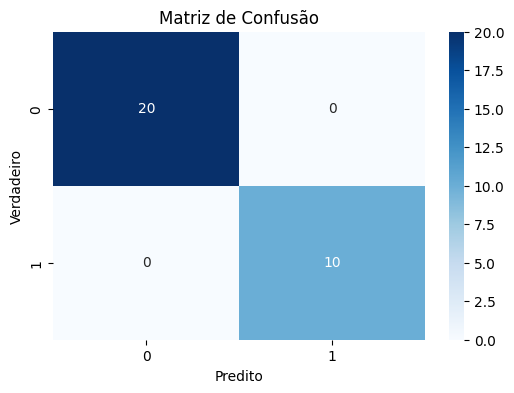

In [11]:
y_true_test = np.array(y_test)
y_pred_test = []
y_prob_test = []

for exemplo in x_test:
    entrada = vetor_para_valores(exemplo)
    previsao = minha_mlp(entrada)
    prob = previsao.data
    y_prob_test.append(prob)
    classe_pred = 1 if prob >= 0.5 else 0
    y_pred_test.append(classe_pred)

cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()


Através dessa matriz de confusão, podemos ver que a rede neural teve um desempenho muito bom na classificação das flores. Todas as amostras foram classificadas corretamente, o que indica que a rede neural aprendeu bem a relação entre os atributos das flores e suas classes. Isso é um bom sinal de que a rede neural está funcionando corretamente e pode ser usada para fazer previsões em novos dados.

# 📖 Referências

[1] Conjunto de dados Iris. UCI Machine Learning Repository. Disponível em: https://archive.ics.uci.edu/dataset/53/iris. Acesso em: 05 de Abril de 2025.

[2] Conjunto de dados Iris. Wikipedia. Disponível em: https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris. Acesso em: 05 de Abril de 2025.

[3] Regression vs. Classification in Machine Learning: What’s the Difference? Disponível em: https://www.springboard.com/blog/data-science/regression-vs-classification/. Acesso em: 05 de Maio de 2025.

[4] Loss Functions in Machine Learning Explained. Disponível em: https://www.datacamp.com/tutorial/loss-function-in-machine-learning. Acesso em: 05 de Maio de 2025.